In [152]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
#plotting
import matplotlib.pyplot as plt
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/test_notebooks/../../analysis/tools/sidm_processor.py'>

In [153]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "sample" : sample_name, 
    },
).events()

In [154]:
events.pv.fields

['rho', 'z', 'isFake', 'ndof', 'normChi2']

In [155]:
p = sidm_processor.SidmProcessor()
out = p.process(events)

In [156]:
out

{'SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6': {'cutflow': <analysis.tools.cutflow.Cutflow at 0x7f263cf55820>,
  'hists': {'pv_n': Hist(Regular(100, 0, 100, name='pv_n', label='pv_n'), storage=Int64()) # Sum: 2339.0,
   'pv_ndof': Hist(Regular(20, 0, 20, name='pv_ndof', label='pv_ndof'), storage=Int64()) # Sum: 26495.0 (61497.0 with flow),
   'pv_z': Hist(Regular(100, -50, 50, name='pv_z', label='pv_z'), storage=Double()) # Sum: 61497.0,
   'pv_rho': Hist(Regular(100, -0.5, 0.5, name='pv_rho', label='pv_rho'), storage=Double()) # Sum: 61497.0,
   'lj_n': Hist(Regular(10, 0, 10, name='lj_n', label='lj_n'), storage=Int64()) # Sum: 2339.0,
   'lj_charge': Hist(Regular(10, -5, 5, name='lj_charge', label='lj_charge'), storage=Int64()) # Sum: 4720.0,
   'lj_pt_type': Hist(
     Regular(100, 0, 100, name='lj_pt', label='Lepton jet pT [GeV]'),
     IntCategory([2, 3, 4, 8], name='lj_type', label='lj_type'),
     storage=Double()) # Sum: 4681.0 (4720.0 with flow),
   'lj_0_pt': Hist(Regular(100

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2625d4a280>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

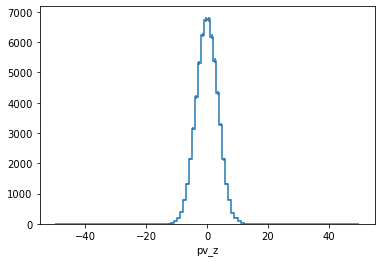

In [157]:
out[sample_name]["hists"]["pv_z"].plot1d()

In [160]:
out[sample_name]["cutflow"].print_table()

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection               18359        18359
PV filter                  18359        18359
Cosmic veto                18359        18359
>=2 LJs                     2339         2339


In [161]:
out[sample_name]["cutflow"].print_table(fraction=True)

cut name        individual cut %    all cuts %    marginal %
------------  ------------------  ------------  ------------
No selection               100.0         100.0         100.0
PV filter                  100.0         100.0         100.0
Cosmic veto                100.0         100.0         100.0
>=2 LJs                     12.7          12.7          12.7


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f263cf39430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

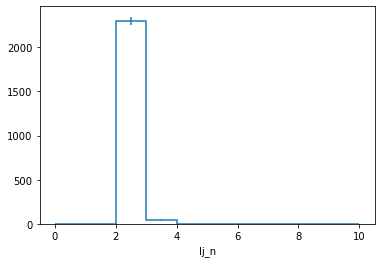

In [151]:
out[sample_name]["hists"]["lj_n"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2681c7e790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

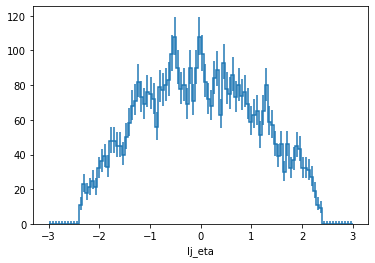

In [78]:
out[sample_name]["hists"]["lj_eta"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2668708310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

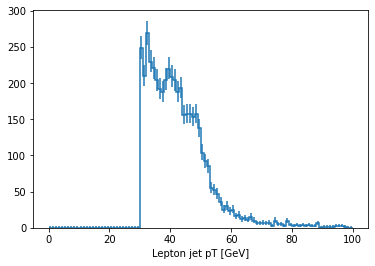

In [79]:
out[sample_name]["hists"]["lj_pt_type"].project("lj_pt").plot1d()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f26686126d0>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2668621c70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f26685d8e80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

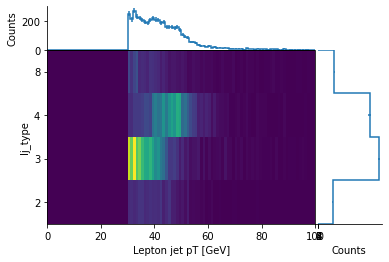

In [80]:
out[sample_name]["hists"]["lj_pt_type"].plot2d_full()

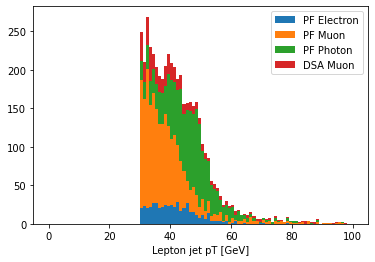

In [81]:
lj_type_names = {
    2 :"PF Electron",
    3 :"PF Muon",
    4 :"PF Photon",
    8 :"DSA Muon",
}
out[sample_name]["hists"]["lj_pt_type"].stack("lj_type").plot(stack=True, histtype="fill")
plt.legend(lj_type_names.values())
plt.show()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f265765b790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

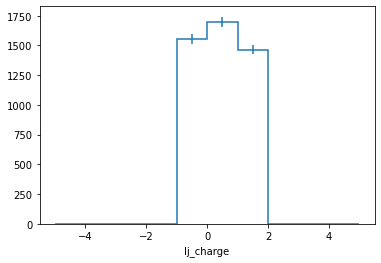

In [82]:
out[sample_name]["hists"]["lj_charge"].plot1d()

In [83]:
ljs = events.ljsource
#ljs = ak.mask(ljs, ak.num(ljs) >= 2)
ljs = ljs[ak.argsort(ljs.p4.pt, ascending=False)]
ljs.p4.pt[ak.num(ljs) >= 2, 1]
print(ak.num(ljs.p4.pt))
print(ak.num(ljs["type"]))

[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]
[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f26576327c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

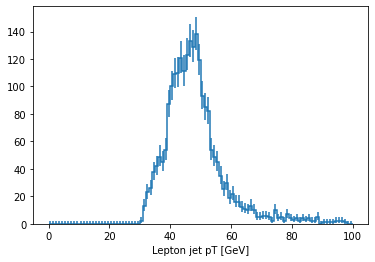

In [84]:
out[sample_name]["hists"]["lj_0_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f26575eb940>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

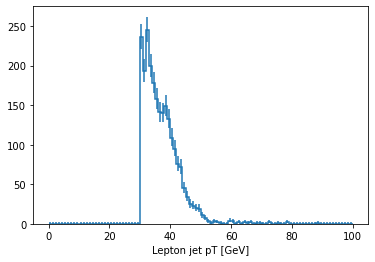

In [85]:
out[sample_name]["hists"]["lj_1_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f26574ecee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

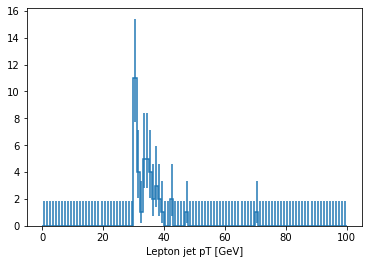

In [86]:
out[sample_name]["hists"]["lj_2_pt"].plot1d()